## Regresie logistica

In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

### 1. Recunoasterea a doua cifre

In [2]:
def get_train_test(train_file: str, test_file: str) -> tuple:
    '''
    The function takes the filenames of the data sets as parameters, reads data from files and returns 4 matrices: 
    X_train, Y_train, X_test, Y_test.
    
    ''' 
    train_data = pd.read_csv(train_file, sep= ',', header= None).values
    test_data = pd.read_csv(test_file, sep= ',', header= None).values
    
    X_train = train_data[:, 1:]
    Y_train = train_data[:, 0]
    X_test = test_data[:, 1:]
    Y_test = test_data[:, 0]
    
    return X_train, Y_train, X_test, Y_test

In [3]:
X_train, Y_train, X_test, Y_test = get_train_test('mnist_train.csv', 'mnist_test.csv')

In [4]:
print('X_train.shape: ', X_train.shape)
print('Y_train.shape: ', Y_train.shape)
print('X_test.shape: ', X_test.shape)
print('Y_test.shape: ', Y_test.shape)

X_train.shape:  (60000, 784)
Y_train.shape:  (60000,)
X_test.shape:  (10000, 784)
Y_test.shape:  (10000,)


In [5]:
def filter_data(X_train, Y_train, X_test, Y_test, digit1: int = 0, digit2: int = 1) -> tuple:
    '''
    The function takes 4 matrices and 2 different digits as parameters.
    The function returns the filtered matrices, containing only the lines coresponding to one of the digits.
    
    '''
    assert(digit1 != digit2) 
        
    X_train_filtered = X_train[(Y_train == digit1) | (Y_train == digit2)]
    Y_train_filtered = Y_train[(Y_train == digit1) | (Y_train == digit2)]
    X_test_filtered = X_test[(Y_test == digit1) | (Y_test == digit2)]
    Y_test_filtered = Y_test[(Y_test == digit1) | (Y_test == digit2)]
    
    return X_train_filtered, Y_train_filtered, X_test_filtered, Y_test_filtered

In [6]:
X_train_filtered, Y_train_filtered, X_test_filtered, Y_test_filtered = filter_data(X_train, Y_train, X_test, Y_test)
Y_train_filtered = Y_train_filtered[:, np.newaxis]
Y_test_filtered = Y_test_filtered[:, np.newaxis]

In [7]:
print('X_train_filtered.shape: ', X_train_filtered.shape)
print('Y_train_filtered.shape: ', Y_train_filtered.shape)
print('X_test_filtered.shape: ', X_test_filtered.shape)
print('Y_test_filtered.shape: ', Y_test_filtered.shape)

X_train_filtered.shape:  (12665, 784)
Y_train_filtered.shape:  (12665, 1)
X_test_filtered.shape:  (2115, 784)
Y_test_filtered.shape:  (2115, 1)


In [8]:
def scale_matrix(matrix: np.ndarray)-> tuple:
    '''
    The fuction takes a bi-dimensional matrix as parameter and scales it on interval [0,1].
    The function returns a tuple containing the scaled matrix and two arrays filled with 
    the minimum and the maximum values on each column.
    
    '''
    #minimum on columns
    min_col = matrix.min(axis = 0)
    
    #maximum on columns
    max_col = matrix.max(axis = 0)
    
    #determine constant columns by checking if all elements on column are equal
    #bool array representing the non-constant columns
    bool_col = np.logical_not(np.all(matrix == matrix[0,:], axis = 0))
    
    #scale each element of matrix (except elements on constant columns)
    matrix[:, bool_col] = (matrix[:, bool_col] - min_col[bool_col]) / (max_col[bool_col] - min_col[bool_col])
    
    #return a tuple
    return matrix, min_col, max_col

In [9]:
X_train_scaled, X_train_min_col, X_train_max_col = scale_matrix(X_train_filtered)
Y_train_scaled, Y_train_min_col, Y_train_max_col = scale_matrix(Y_train_filtered)
X_test_scaled, X_test_min_col, X_test_max_col = scale_matrix(X_test_filtered)
Y_test_scaled, Y_test_min_col, Y_test_max_col = scale_matrix(Y_test_filtered)

In [10]:
def extend_matrix(matrix: np.ndarray, value: int = 1) -> np.ndarray:
    '''
    The function takes a bi-dimensional matrix and an integer value as parameters.
    The function inserts a column of ones at the beginning of the matrix.
    The function returns the extended matrix.
        
    '''
    matrix = np.insert(matrix, 0, value, axis = 1)
    return matrix

In [11]:
X_train_extended = extend_matrix(X_train_scaled)
X_test_extended = extend_matrix(X_test_scaled)

In [12]:
print('X_train_extended.shape: ', X_train_extended.shape)
print('X_test_extended.shape: ', X_test_extended.shape)

X_train_extended.shape:  (12665, 785)
X_test_extended.shape:  (2115, 785)


In [13]:
def sigmoid(z):
    '''
    The logistic sigmoid function.
    
    '''
    return 1 / (1 + np.exp(-z))

In [14]:
def model(X, theta):
    '''
    The predicted model for linear regression.
    
    '''
    return sigmoid(X.dot(theta))

In [15]:
def error_function(X, Y, theta, n):
    '''
    The error function with regularization.
    
    '''
    m = X.shape[0]
    h = model(X, theta)
    theta_regularized = theta
    theta_regularized[0, 0] = 0
    
    return - (1 / m) * np.sum(Y * np.log(h) + (1 - Y) * np.log(1 - h)) + n / (2 * m) * np.sum(theta_regularized ** 2)

In [16]:
def gradient_descent(X, Y, alpha, max_iterations, n):
    '''
    The function calculates theta and error function values for the predicted model, using gradient descent algorithm.
    
    '''
    m = X.shape[0]
    theta = np.zeros((X.shape[1], 1))
    theta_regularized = theta
    theta_regularized[0, 0] = 0
    current_iteration = 0
    error_list = []
    
    for current_iteration in range(max_iterations):
        #update theta 
        theta = theta - alpha * (1 / m) * np.sum((model(X, theta) - Y) * X, axis = 0)[:, np.newaxis] + n / m * theta_regularized

        #calculate error function values
        current_error = error_function(X, Y, theta, n)
        error_list.append(current_error)
        
    return theta, error_list

Error:  0.5229732088447139


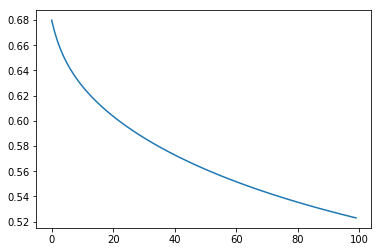

In [17]:
alpha = 1
max_iterations = 100
n = 1

theta, error_list = gradient_descent(X_train_extended, Y_train_scaled, alpha, max_iterations, n)

print('Error: ', error_list[len(error_list) - 1])

plt.plot(error_list)
plt.show()

In [18]:
def calculate_accuracy(X, Y, theta):
    '''
    The function calculates the accuracy of the predicted model: the percentage of cases in which data is corectly estimated.
    
    '''
    
    estimated_values = (np.around(model(X, theta)) == Y)
    corectly_estimated_values = estimated_values[estimated_values == True]
    accuracy = len(corectly_estimated_values) * 100 / len(estimated_values)
    
    return accuracy

In [19]:
accuracy = calculate_accuracy(X_test_extended, Y_test_filtered, theta)
print('Accuracy of the predicted model: ', round(accuracy, 2), '%')

Accuracy of the predicted model:  78.87 %


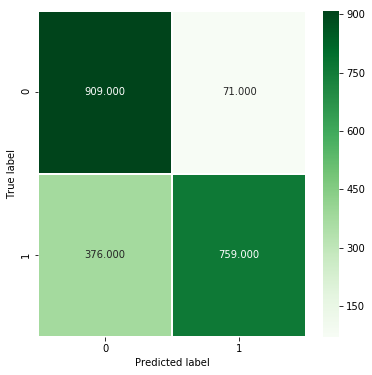

In [20]:
Y_true = Y_test_filtered
Y_predicted = np.around(model(X_test_extended, theta))

cm = confusion_matrix(Y_true, Y_predicted)

plt.figure(figsize=(6,6))
sn.heatmap(cm, annot=True, fmt='.3f', linewidth=1, cmap='Greens');
plt.ylabel('True label');
plt.xlabel('Predicted label');

### 2. Recunoasterea tuturor celor 10 cifre (regresie logistica multinomiala)

In [21]:
X_train2, Y_train2, X_test2, Y_test2 = get_train_test('mnist_train.csv', 'mnist_test.csv')

In [22]:
Y_train2 = Y_train2[:, np.newaxis]
Y_test2 = Y_test2[:, np.newaxis]

In [23]:
print('X_train2.shape: ', X_train2.shape)
print('Y_train2.shape: ', Y_train2.shape)
print('X_test2.shape: ', X_test2.shape)
print('Y_test2.shape: ', Y_test2.shape)

X_train2.shape:  (60000, 784)
Y_train2.shape:  (60000, 1)
X_test2.shape:  (10000, 784)
Y_test2.shape:  (10000, 1)


In [24]:
#Scaling X data sets
X_train2_scaled, X_train2_min_col, X_train2_max_col = scale_matrix(X_train2)
X_test2_scaled, X_test2_min_col, X_testn2_max_col = scale_matrix(X_test2)

In [25]:
#One-hot encoding for Y data sets
def one_hot(Y):
    encoding = np.zeros((Y.shape[0], 10))
    encoding[np.arange(0, Y.shape[0]), Y[:, 0]] = 1
    
    return encoding

In [26]:
Y_train2_encoded = one_hot(Y_train2)
Y_test2_encoded = one_hot(Y_test2)

print('Y_train2_encoded.shape: ', Y_train2_encoded.shape)
print('Y_test2_encoded.shape: ', Y_test2_encoded.shape)

Y_train2_encoded.shape:  (60000, 10)
Y_test2_encoded.shape:  (10000, 10)


In [27]:
#Adaugarea unei coloane de 1
X_train2_extended = extend_matrix(X_train2_scaled)
X_test2_extended = extend_matrix(X_test2_scaled)

In [28]:
print('X_train2_extended.shape: ', X_train2_extended.shape)
print('X_test2_extended.shape: ', X_test2_extended.shape)

X_train2_extended.shape:  (60000, 785)
X_test2_extended.shape:  (10000, 785)


In [34]:
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=0)

In [35]:
def h(X, theta):
    '''
    The predicted model function.
    
    '''
    return softmax(X.dot(theta))

In [36]:
def cost_function(X, Y, theta, n):
    '''
    The error function with regularization.
    
    '''
    m = X.shape[0]
    model = h(X, theta)
    theta_regularized = theta
    theta_regularized[0, 0] = 0
    
    return - (1 / m) * np.sum(Y * np.log(model)) + (n / m) * np.sum(theta_regularized ** 2)

In [37]:
def gradient(X, Y, alpha, max_iterations, n):
    '''
    The function calculates theta and error function values for the predicted model, using gradient descent algorithm.
    
    '''
    m = X.shape[0]
    theta = np.zeros((X.shape[1], 1))
    theta_regularized = theta
    theta_regularized[0, 0] = 0
    current_iteration = 0
    error_list = []
    
    for current_iteration in range(max_iterations):
        #update theta 
        theta = theta - alpha * (- 1 / m) * X.T.dot(Y - h(X, theta)) + (n / m) * theta_regularized

        #calculate error function values
        current_error = error_function(X, Y, theta, n)
        error_list.append(current_error)
        
    return theta, error_list

Error:  45.368128631625645


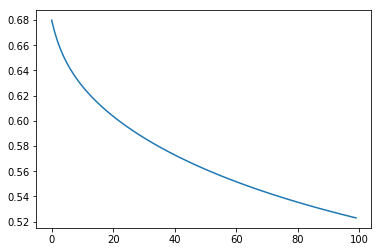

In [38]:
a = 1
iterations = 50
n = 1

t, errors = gradient(X_train2_extended, Y_train2_encoded, a, iterations, n)

print('Error: ', errors[len(errors) - 1])

plt.plot(error_list)
plt.show()

In [ ]:
accuracy = calculate_accuracy(X_test2_extended, Y_test2_encoded, t)
print('Accuracy of the predicted model: ', round(accuracy, 2), '%')